In [27]:

 
#writing some conda package or module
#!pip install netCDF4

%matplotlib inline

import glob
from scipy import stats
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point



In [28]:
rain_minimum = 1.0
rain_maximum = 250.0
rain_step = 1.0
spd = 86400.0
sph = 3600.0

nrainbin = int((rain_maximum-rain_minimum)/rain_step) + 1

rain_pdf = np.linspace(rain_minimum,rain_maximum, num=nrainbin, endpoint=True)
rain_bin = np.zeros((nrainbin-1))


In [29]:
pr = xr.load_dataset('/home/mkibria/Academic/pr_of_thesis/reanalysis/JRA55/monthly/JRA55_MONTHLY_1980_2015.nc')
pr

<xarray.Dataset>
Dimensions:  (time: 432, lon: 640, lat: 320)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2015-12-01
  * lon      (lon) float64 0.0 0.5625 1.125 1.688 ... 357.8 358.3 358.9 359.4
  * lat      (lat) float64 89.57 89.01 88.45 87.89 ... -88.45 -89.01 -89.57
Data variables:
    tpr      (time, lat, lon) float32 0.3525 0.3525 0.3525 ... 0.1621 0.1621
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Wed Jun 15 14:15:39 2022: cdo mergetime JRA55_monthly_tpr.n...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [30]:
size = pr.tpr.shape
#print(size[2])
print(size)



(432, 320, 640)


In [31]:
for time in range(size[0]):
        data =  pr.tpr[time,Ellipsis]
        nzd = data.values[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin = rain_bin + hist[0]

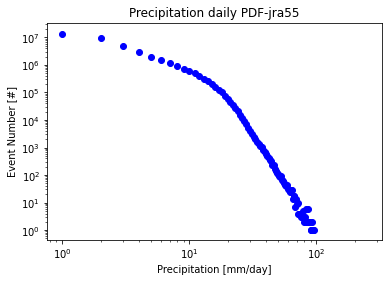

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(rain_bin, 'bo')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('Precipitation [mm/day]')
plt.ylabel('Event Number [#]')
plt.title('Precipitation daily PDF-jra55')


plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/pdf_jra55.png")


plt.show( )